In [35]:
from qiskit import * ### Importing the library to our notebook
from qiskit_aer import AerSimulator
from qiskit_aer import AerProvider
from qiskit.visualization import plot_histogram
%matplotlib inline


In [37]:
### Deutsch-Jozsa algorithm on f(x1,x2,x3)= x_1\xor x_3
#from qiskit.tools.monitor import job_monitor
#from qiskit import IBMQ
n=3 ### Number of variables in the underlying Boolean function


#implement affine function


q = QuantumRegister(n, 'q')
t = QuantumRegister(1, 't')
c = ClassicalRegister(n, 'c')
qc_dj = QuantumCircuit(q,t,c)


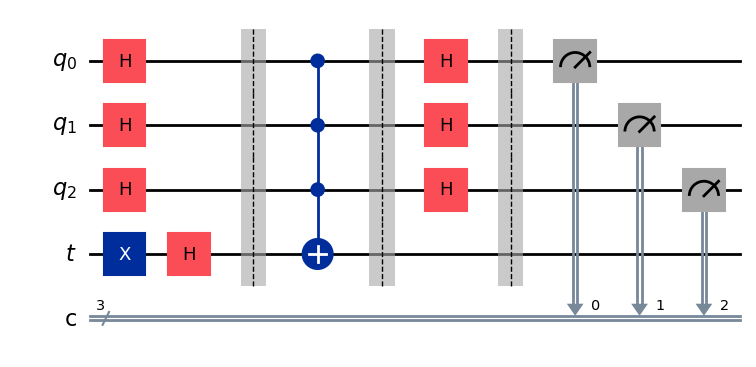

In [38]:
from qiskit.circuit.library import MCXGate
gate = MCXGate(3)

### Initialization
for i in range(n):
    qc_dj.h(q[i])
qc_dj.x(t)
qc_dj.h(t)
qc_dj.barrier()

### Oracle for f(x1,x2,x3)=x_1.x_2.x_3
qc_dj.append(gate, [0, 1, 2, 3])
qc_dj.barrier()


#Final set of Hadamard gates
for i in range(n):
    qc_dj.h(q[i])
qc_dj.barrier()

#Final Measurement
qc_dj.measure(q,c)
qc_dj.draw(output='mpl')

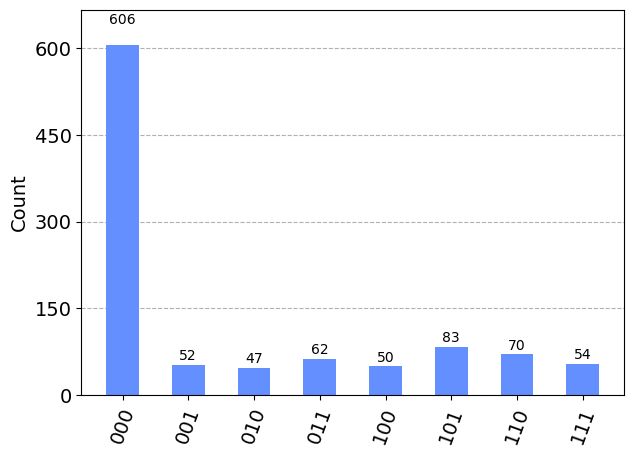

In [39]:

from qiskit_aer import AerSimulator
from qiskit_aer import AerProvider

prov = AerProvider()
sv_simulator = prov.get_backend('qasm_simulator')

result = sv_simulator.run(qc_dj).result()
plot_histogram(result.get_counts(qc_dj))